In [7]:
import numpy as np
from FFNN import FFNN
import functions
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import accuracy_score
import random
%matplotlib inline

In [4]:
# A function that plots a decision boundary
def plot_decision(function, data, labels):
    x_min, y_min = data.min(axis=0)
    x_max, y_max = data.max(axis=0)
    
    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = np.array([function(vals) for vals in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    colors = ['red', 'blue', 'green', 'yellow']
    #plt.circles(xx, yy, Z, color=[colors[l] for l in labels])
    plt.contourf(xx, yy, Z)

    plt.scatter(*data.T, color=[colors[l] for l in labels])
    plt.show()

In [15]:
# Create a spiral dataset
def create_spiral():
    N = 100 # number of points per class
    D = 2 # dimensionality
    K = 2 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,2,N) # radius
      t = np.linspace(j*1,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    return X, y

In [20]:
# Test a given model
def test_model_classification(model, niter=100, nfeatures=2, ngroups=2):
    random.seed(0)
    data, labels = create_spiral()
    lprobs = [np.array([1. if j == l else 0. for j in range(ngroups)]) for l in labels]
    def accuracy(nn, data, label):
        return accuracy_score([np.argmax(nn.forward(d)) for d in data], labels)
    err = []
    for i in range(niter):
        # Choose a random training sample
        i = random.randint(0, len(data) - 1)
        model.train(data[i], lprobs[i])
        
        # Calculate the error
        err.append(accuracy(model, data, labels))
    plt.plot(err)
    plt.show()
    
    # Also plot the decision boundary
    plot_decision(lambda x: np.argmax(model.forward(x)), data, labels)
    for i in range(ngroups):
        plot_decision(lambda x: np.argmax(model.forward(x)), data, labels)

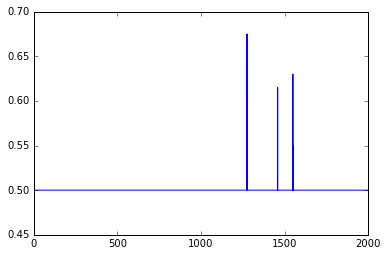

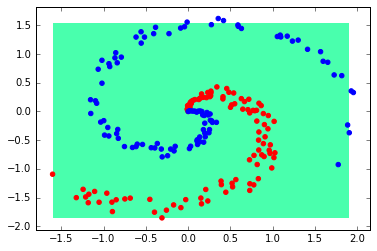

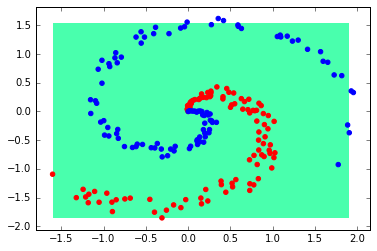

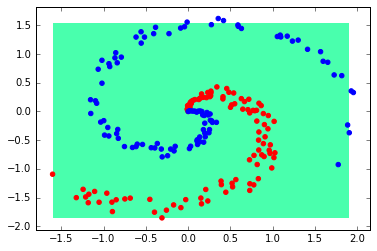

In [21]:
nfeatures = 2
ngroups = 2
test_model_classification(FFNN(layers=[8,2,2], random_seed=0, insize=nfeatures, outsize=ngroups), niter=2000, ngroups=ngroups, nfeatures=nfeatures)

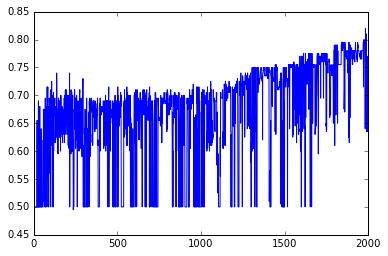

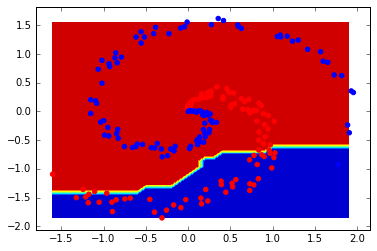

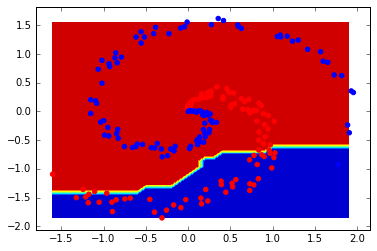

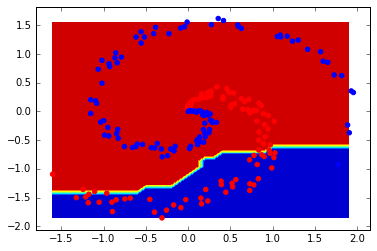

In [22]:
test_model_classification(FFNN(activation=functions.tanh, layers=[8,2,2], random_seed=0, insize=nfeatures, outsize=ngroups), niter=2000, ngroups=ngroups, nfeatures=nfeatures)

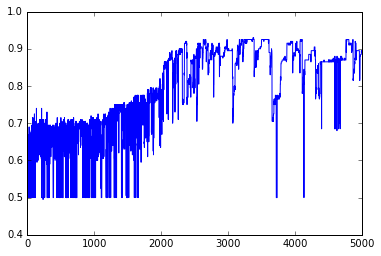

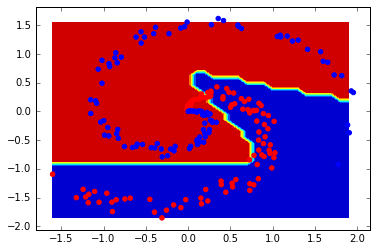

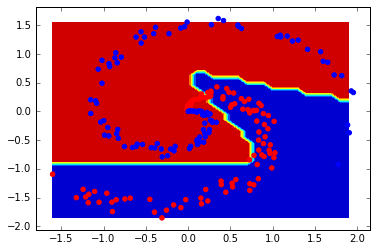

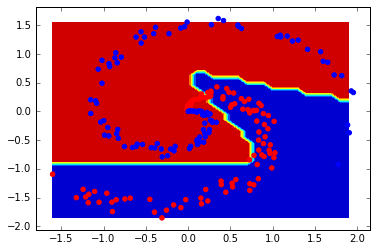

In [23]:
test_model_classification(FFNN(activation=functions.tanh, layers=[8,2,2], random_seed=0, insize=nfeatures, outsize=ngroups), niter=5000, ngroups=ngroups, nfeatures=nfeatures)